In [20]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import TimeSeries
import pandas as pd
import os

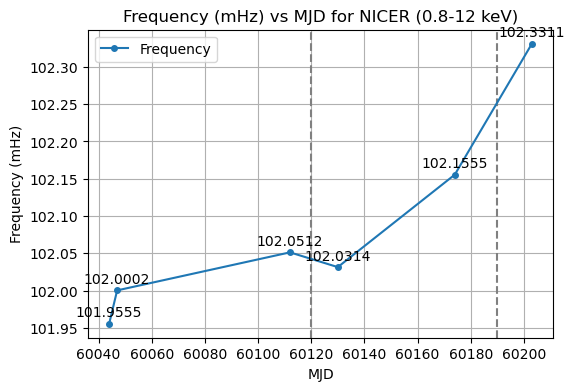

In [2]:
# Data
period = np.array([9.8082, 9.8039, 9.7990, 9.8009, 9.7890, 9.7722])
mjd = [60044, 60047, 60112, 60130, 60174, 60203]
p_err = np.array([0.01753, 0.00059, 0.00056, 0.00059, 0.00055, 0.00070])

# Frequency and error in mHz
frequency_mHz = (10**3 / period)
f_err_mHz = (p_err / period**2) * 10**3  # mHz units

# Plot with error bars
plt.figure(figsize=(6,4))
plt.errorbar(mjd, frequency_mHz, fmt="-o", capsize=2, markersize=4, label="Frequency")

# Annotate each point with the frequency value
for i in range(len(mjd)):
    plt.annotate(f'{frequency_mHz[i]:.4f}', (mjd[i], frequency_mHz[i]), 
                 textcoords="offset points", xytext=(0,5), ha='center')

# Add vertical lines
plt.axvline(60120, ls="--", color="grey")
plt.axvline(60190, ls="--", color="grey")

# Labels and title
plt.ylabel('Frequency (mHz)')
plt.xlabel('MJD')
plt.title("Frequency (mHz) vs MJD for NICER (0.8-12 keV)")
plt.grid()
plt.legend()

# Show the plot
plt.show()


In [4]:
#### Testing the fits file header ####
# # profile = fits.open('./6050390201/xti/event_cl/6050390201_pulse_profile.fits')
# profile=fits.open('./6050390201/xti/event_cl/ni6050390201_cl_night_barycorrmpu7_sr_night.lc')
# data = profile[1].data
# profile[1].header
# # intensities = data['RATE1']
# # phase= data['PHASE']

## Using efold output file (already folded light curve with fixed phase bin numbers)

In [3]:
def read_files(path):
    # Open the FITS file
    profile = fits.open(path)
    data = profile[1].data
    intensities = data['RATE1']
    phase = data['PHASE']
    errors = data['ERROR1']

    # Find the maximum and minimum intensities
    I_max = np.max(intensities)
    I_min = np.min(intensities)

    # Calculate the pulsed fraction
    pulsed_fraction = (I_max - I_min) / (I_max + I_min)
    
    # Calculate the phase-averaged count rate
    r_bar = np.mean(intensities)
    # Calculate the RMS pulsed fraction (pf_rms)
    rms_pulsed_fraction = np.sqrt(np.mean((intensities - r_bar) ** 2)) / r_bar
    
    return phase, intensities, errors, pulsed_fraction,rms_pulsed_fraction


def calc_pf_plot(lc_arr,plot=True):
    pf_arr=np.array([])
    rmspf_arr=np.array([])
    for lc in lc_arr: 
        phase_arr, intensity_arr,error_arr, pf,rmspf = read_files(lc)
        pf_arr=np.append(pf_arr,pf)
        rmspf_arr=np.append(rmspf_arr,rmspf)
        # Print the results
        print(f"File: {lc}")
        print(f"Max photon flux: {intensity_arr.max():.4f} counts/sec")
        print(f"Pulsed Fraction: {pf:.4f}, RMS Pulsed Fraction: {rmspf:.4f}")
        
        # Repeat the phase, intensity, and error to plot twice for visual appearance (phase 0 to 2)
        phase_arr_double = np.concatenate([phase_arr, phase_arr + 1])
        intensity_arr_double = np.concatenate([intensity_arr, intensity_arr])
        error_arr_double = np.concatenate([error_arr, error_arr])
        if(plot==True):
            plt.figure(figsize=(8,4))
            plt.errorbar(phase_arr_double, intensity_arr_double, yerr=error_arr_double, fmt='-o', capsize=2, label='Light Curve',alpha=0.7)
            plt.xlabel("Phase (0-2)")
            plt.ylabel("Flux (counts/sec)")
            plt.title(f"Folded Light Curve (2 Cycles)\nPulsed Fraction: {rmspf:.4f}")
            plt.grid(True)
            plt.legend()
            plt.show()
    return pf_arr,rmspf_arr

File: ./6050390201/xti/event_cl/6050390201_pulse_profile.fits
Max photon flux: 32.1336 counts/sec
Pulsed Fraction: 0.2553, RMS Pulsed Fraction: 0.1465


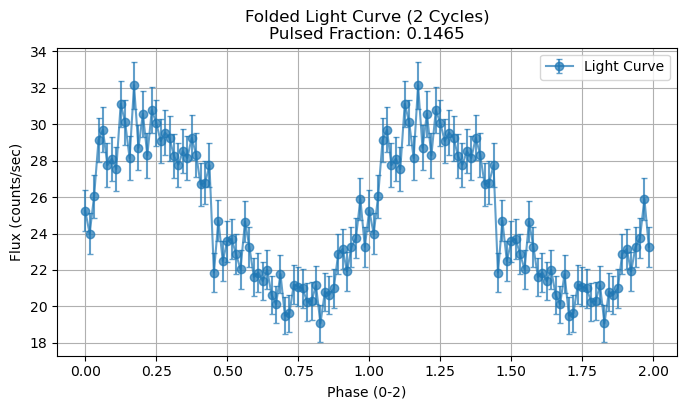

File: ./6050390204/xti/event_cl/6050390204_pulse_profile.fits
Max photon flux: 16.9304 counts/sec
Pulsed Fraction: 0.3416, RMS Pulsed Fraction: 0.1585


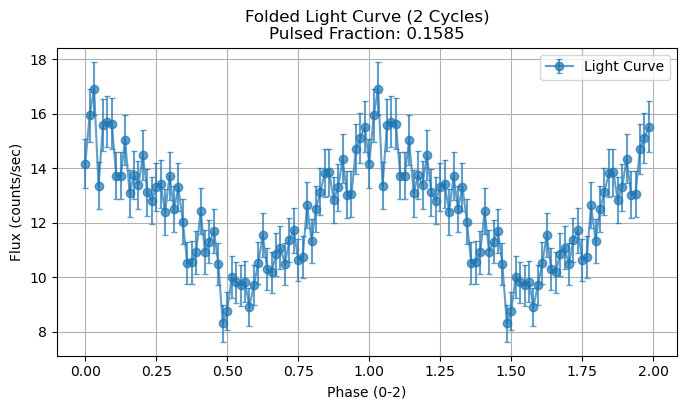

File: ./6050390227/xti/event_cl/6050390227_pulse_profile.fits
Max photon flux: 1168.2972 counts/sec
Pulsed Fraction: 0.2127, RMS Pulsed Fraction: 0.1401


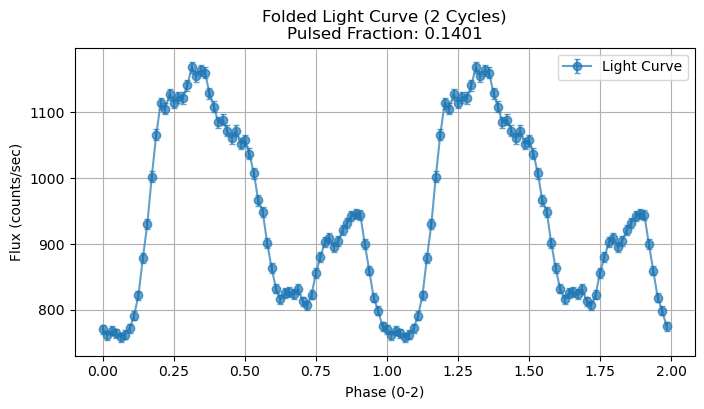

File: ./6050390244/xti/event_cl/6050390244_pulse_profile.fits
Max photon flux: 2231.0344 counts/sec
Pulsed Fraction: 0.1924, RMS Pulsed Fraction: 0.1349


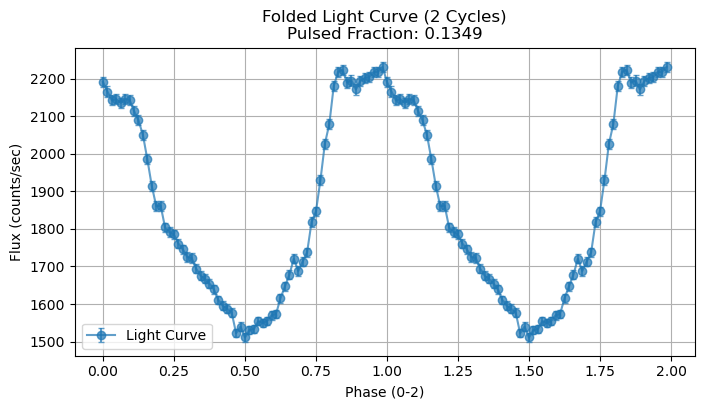

File: ./6050390261/xti/event_cl/6050390261_pulse_profile.fits
Max photon flux: 618.3613 counts/sec
Pulsed Fraction: 0.2196, RMS Pulsed Fraction: 0.1308


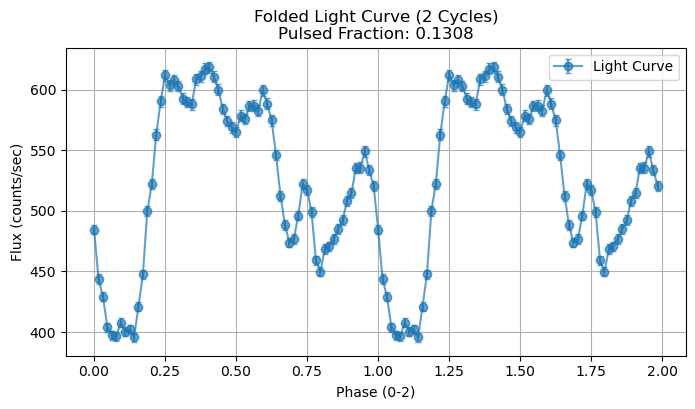

File: ./6050390284/xti/event_cl/6050390284_pulse_profile.fits
Max photon flux: 31.3302 counts/sec
Pulsed Fraction: 0.2161, RMS Pulsed Fraction: 0.1409


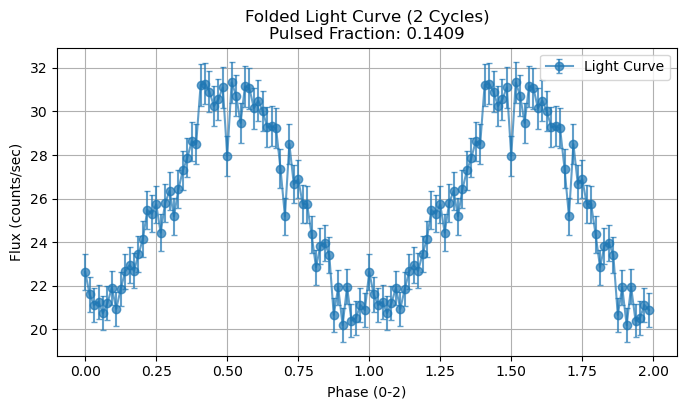

In [4]:
## Using the efold method
lc1='./6050390201/xti/event_cl/6050390201_pulse_profile.fits'
lc2='./6050390204/xti/event_cl/6050390204_pulse_profile.fits'
lc3='./6050390227/xti/event_cl/6050390227_pulse_profile.fits'
lc4='./6050390244/xti/event_cl/6050390244_pulse_profile.fits'
lc5='./6050390261/xti/event_cl/6050390261_pulse_profile.fits'
lc6='./6050390284/xti/event_cl/6050390284_pulse_profile.fits'
lc_arr=[lc1,lc2,lc3,lc4,lc5,lc6]

pf_arr,rmspf_arr=calc_pf_plot(lc_arr,plot=True)

### Plotting simple PF and rms PF vs count rate of Swift (per cm^2)

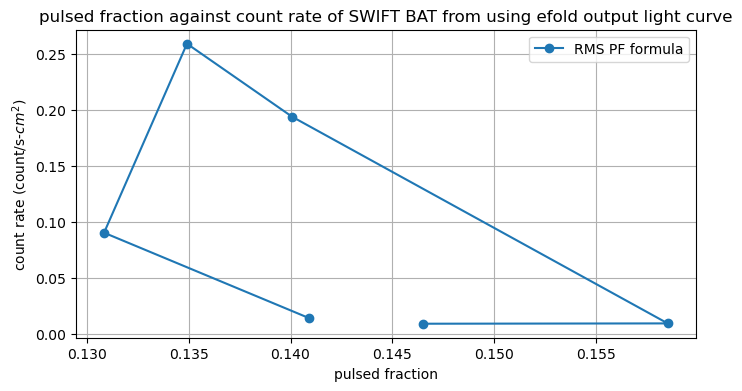

In [5]:
count_rate_swift=np.array([0.0089357,0.00922004,0.19404365,0.2593448,0.09031704,0.01413414])
plt.figure(figsize=(8,4))
#plt.plot(pf_arr,count_rate_swift,"-o")
plt.plot(rmspf_arr,count_rate_swift,"-o",label='RMS PF formula')
plt.ylabel('count rate (count/s-$cm^2$)')
plt.xlabel('pulsed fraction')
plt.title('pulsed fraction against count rate of SWIFT BAT from using efold output light curve')
plt.legend()
plt.grid()

## Using nicerl3-lc output light curve directly. Rms PF

The count rate seems to be little different (possibly due to how I bin vs how efold bins)

The peak seems to have a time offset. (Even with using timezero as reference it is not folding correctly)

In [8]:
# # Function to read FITS file, fold the light curve, and calculate RMS pulsed fractions
# def read_files_rms(path, period, num_bins, use_timezero):
#     # Open the FITS file
#     with fits.open(path) as profile:
#         data = profile[1].data
#         header = profile[1].header

#         # Extract the TIMEZERO from the header if use_timezero is True, taking this as epoch ref?
#         time_zero = header.get('TIMEZERO', 0.0) if use_timezero else 0.0

#     # Extract the time, intensity (rate), and error values
#     time = data['TIME']  
#     intensities = data['RATE'] 
#     errors = data['ERROR']

#     # Adjust time using TIMEZERO if applicable
#     time_adjusted = time - time_zero

#     # Fold the light curve using the provided period
#     phases = (time_adjusted % period) / period  # Normalize phase between 0 and 1

#     # Bin the data into the requested number of phase bins
#     bin_edges = np.linspace(0, 1, num_bins + 1)
#     phase_bins = (bin_edges[:-1] + bin_edges[1:]) / 2  # Midpoints of bins
#     intensity_binned, _ = np.histogram(phases, bins=bin_edges, weights=intensities)
#     error_binned, _ = np.histogram(phases, bins=bin_edges, weights=errors**2)
#     counts, _ = np.histogram(phases, bins=bin_edges)

#     # Compute average intensity and error in each bin
#     intensity_binned /= counts
#     error_binned = np.sqrt(error_binned) / counts

#     # Calculate the phase-averaged count rate
#     r_bar = np.mean(intensity_binned)

#     # Calculate the RMS pulsed fraction (f_rms)
#     rms_pulsed_fraction = np.sqrt(np.mean((intensity_binned - r_bar) ** 2)) / r_bar
    
#     return phase_bins, intensity_binned, error_binned, rms_pulsed_fraction

# def calc_pfrms_plot(lc_arr, period_arr, phase_bins_arr, use_timezero=True,plot=True):
#     pf_arr = np.array([])

#     # Ensure the input arrays have the same length
#     assert len(lc_arr) == len(period_arr) == len(phase_bins_arr), "The number of light curves, periods, and phase bins must match."

#     for lc, period, phase_bins in zip(lc_arr, period_arr, phase_bins_arr):
#         # Read the phase, intensities, and pulsed fraction
#         phase_arr, intensity_arr, error_arr, pf = read_files_rms(lc, period, phase_bins, use_timezero)
#         pf_arr = np.append(pf_arr, pf)

#         # Print the results
#         print(f"File: {lc}")
#         print(f"Period: {period:.4f} sec")
#         print(f"Phase bins: {phase_bins}")
#         print(f"Max photon flux: {intensity_arr.max():.4f} counts/sec")
#         print(f"Pulsed Fraction: {pf:.4f}")

#         # Repeat the phase, intensity, and error to plot over two cycles (0 to 2)
#         phase_arr_double = np.concatenate([phase_arr, phase_arr + 1])
#         intensity_arr_double = np.concatenate([intensity_arr, intensity_arr])
#         error_arr_double = np.concatenate([error_arr, error_arr])
        
#         if(plot==True):
#             # Plot the folded light curve with error bars
#             plt.figure(figsize=(8, 4))
#             plt.errorbar(phase_arr_double, intensity_arr_double, yerr=error_arr_double, fmt='-o', capsize=2, label=f'Light Curve (Period: {period:.4f} s)', alpha=0.7)
#             plt.xlabel("Phase (0-2)")
#             plt.ylabel("Flux (counts/sec)")
#             plt.title(f"Folded Light Curve (2 Cycles)\nPulsed Fraction: {pf:.4f}")
#             plt.grid(True)
#             plt.legend()

#             # Show the plot
#             plt.show()

#     return pf_arr

# lc1 = './6050390201/xti/event_cl/ni6050390201_cl_night_barycorrmpu7_sr_night.lc'
# lc2 = './6050390204/xti/event_cl/ni6050390204_cl_night_barycorrmpu7_sr_night.lc'
# lc3 = './6050390227/xti/event_cl/ni6050390227_cl_night_barycorrmpu7_sr_night.lc'
# lc4 = './6050390244/xti/event_cl/ni6050390244_cl_night_barycorrmpu7_sr_night.lc'
# lc5 = './6050390261/xti/event_cl/ni6050390261_cl_night_barycorrmpu7_sr_night.lc'
# lc6 = './6050390284/xti/event_cl/ni6050390284_cl_night_barycorrmpu7_sr_night.lc'

# lc_arr = [lc1, lc2, lc3, lc4, lc5, lc6]
# period = np.array([9.8082, 9.8039, 9.7990, 9.8009, 9.7890, 9.7722])
# phase_bins=[64,64,64,64,64,64]

# # Example of calculating pulsed fraction for all light curves
# pf_arr = calc_pfrms_plot(lc_arr, period,phase_bins,plot=True )

In [9]:
# count_rate_swift=np.array([0.0089357,0.00922004,0.19404365,0.2593448,0.09031704,0.01413414])
# plt.figure(figsize=(8,4))
# plt.plot(rmspf_arr,count_rate_swift,"-o",label='RMS from efold output',c='b')
# plt.plot(pf_arr,count_rate_swift,"-o",label='RMS from python folding',c='g')
# plt.ylabel('count rate (count/s-$cm^2$)')
# plt.xlabel('pulsed fraction')
# plt.title('pulsed fraction against count rate of SWIFT BAT from using efold output light curve')
# plt.legend()
# plt.grid()

## Folding by python

In [11]:
def read_fits_lightcurve(fits_file):
    with fits.open(fits_file) as hdulist:
        rate_data = hdulist['RATE'].data
        time = rate_data['TIME']
        rate = rate_data['RATE']
        rate_error = rate_data['ERROR']  # or the correct column name for the error
        tstart = hdulist[1].header['TSTART']

    return tstart, time, rate, rate_error

In [29]:
def bin_time_series(time, rate, rate_error, bin_size):
    num_bins = int((time.max() - time.min()) // bin_size)
    # Bin the data using np.histogram
    binned_time = np.linspace(time.min(), time.max(), num_bins)
    binned_rate = np.zeros(num_bins)
    binned_rate_error = np.zeros(num_bins)

    for i in range(num_bins - 1):
        # Find the indices within the current bin
        bin_indices = np.where((time >= binned_time[i]) & (time < binned_time[i+1]))[0]
        if len(bin_indices) > 0:
            binned_rate[i] = np.mean(rate[bin_indices])
            binned_rate_error[i] = np.sqrt(np.sum(rate_error[bin_indices]**2)) / len(bin_indices)

    return binned_time[:-1], binned_rate[:-1], binned_rate_error[:-1]


def fold_light_curve(time, rate, rate_error, period, num_phase_bins, tstart):
    # Calculate the relative time with respect to 0 value of time array. It starts from 2.1 sec for some reason
    relative_time = time
    phase = (relative_time % period) / period
    phase_bin_size = period / num_phase_bins
    phase_bins = np.linspace(0, 1, num_phase_bins + 1)
    binned_rate = np.zeros(num_phase_bins)
    binned_rate_error = np.zeros(num_phase_bins)

    for i in range(num_phase_bins):
        bin_indices = np.where((phase >= phase_bins[i]) & (phase < phase_bins[i+1]))[0]
        if len(bin_indices) > 0:
            binned_rate[i] = np.mean(rate[bin_indices])
            binned_rate_error[i] = np.sqrt(np.sum(rate_error[bin_indices]**2)) / len(bin_indices)

    return phase_bins[:-1], binned_rate, binned_rate_error

In [33]:
# Function to calculate phase-resolved RMS
def calculate_rms(phase, binned_rate):
    I_max = np.max(binned_rate)
    I_min = np.min(binned_rate)

    # Calculate the pulsed fraction
    pulsed_fraction = (I_max - I_min) / (I_max + I_min)
    
    # Calculate the phase-averaged count rate
    r_bar = np.mean(binned_rate)
    
    # Calculate the RMS pulsed fraction (pf_rms)
    rms_pulsed_fraction = np.sqrt(np.mean((binned_rate - r_bar) ** 2)) / r_bar
    
    return pulsed_fraction, rms_pulsed_fraction


def plot_folded_light_curve(phase, binned_rate, binned_rate_error, obs_id, output_folder):
    # Repeat the phase and binned data to cover two cycles (0-2)
    extended_phase = np.concatenate([phase, phase + 1])
    extended_binned_rate = np.concatenate([binned_rate, binned_rate])
    extended_binned_rate_error = np.concatenate([binned_rate_error, binned_rate_error])

    # Plot the folded light curve for two cycles
    plt.errorbar(extended_phase, extended_binned_rate, yerr=extended_binned_rate_error, fmt='o', markersize=3, label='Folded Light Curve')
    plt.xlabel('Phase (0-2)')
    plt.ylabel('Count Rate')
    plt.title(f'Folded Light Curve for ObsID {obs_id} (Two Cycles)')
    plt.grid(True)
    plt.show()
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Save the plot to the folder
    plot_file = os.path.join(output_folder, f'{obs_id}_folded_curve.png')
    plt.savefig(plot_file)
    plt.close()

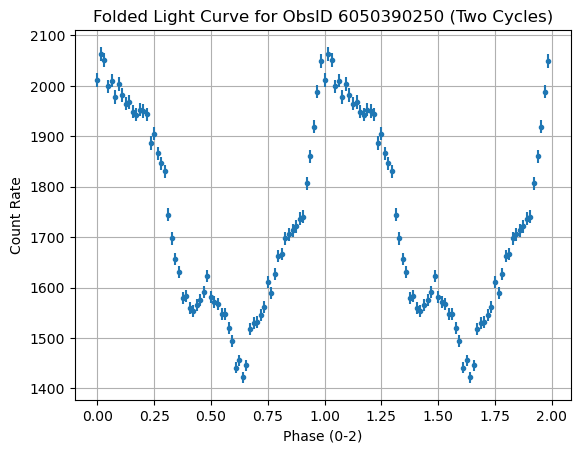

Processed ObsID 6050390250 with period 9.795. RMS and pulsed RMS saved.


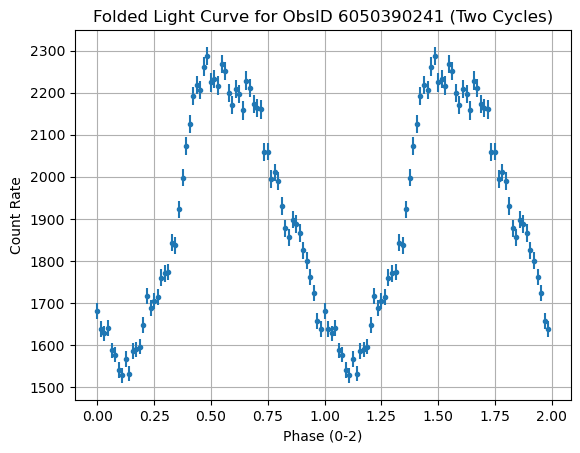

Processed ObsID 6050390241 with period 9.801. RMS and pulsed RMS saved.


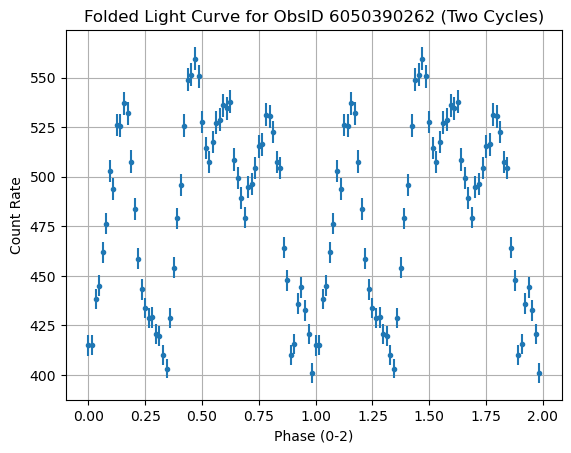

Processed ObsID 6050390262 with period 9.789. RMS and pulsed RMS saved.


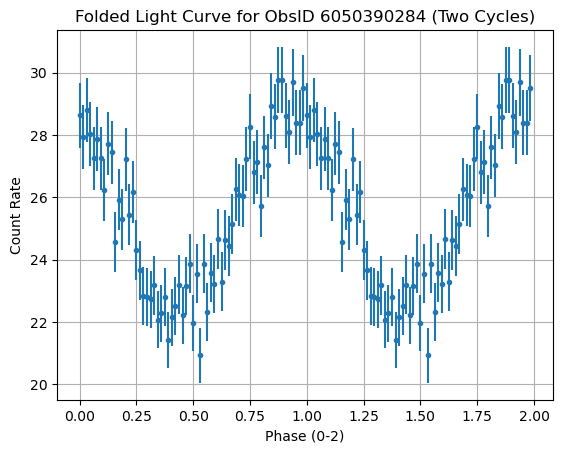

Processed ObsID 6050390284 with period 9.772. RMS and pulsed RMS saved.


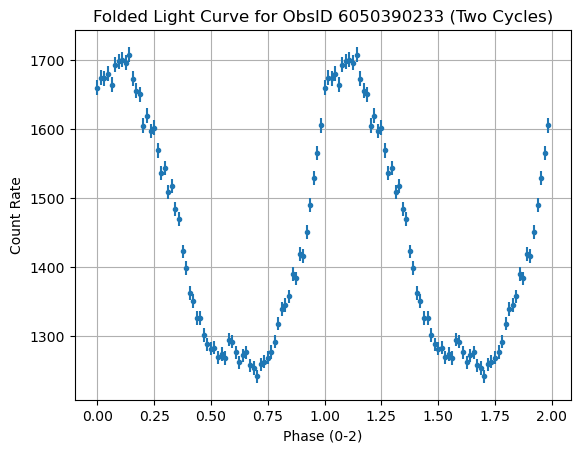

Processed ObsID 6050390233 with period 9.797. RMS and pulsed RMS saved.


/tmp/ipykernel_99827/4128404643.py:7: RuntimeWarning: invalid value encountered in scalar divide
  pulsed_fraction = (I_max - I_min) / (I_max + I_min)
/tmp/ipykernel_99827/4128404643.py:13: RuntimeWarning: invalid value encountered in scalar divide
  rms_pulsed_fraction = np.sqrt(np.mean((binned_rate - r_bar) ** 2)) / r_bar


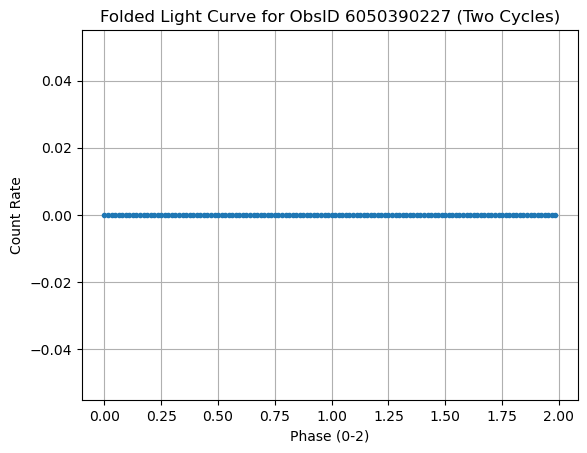

Processed ObsID 6050390227 with period 9.799. RMS and pulsed RMS saved.


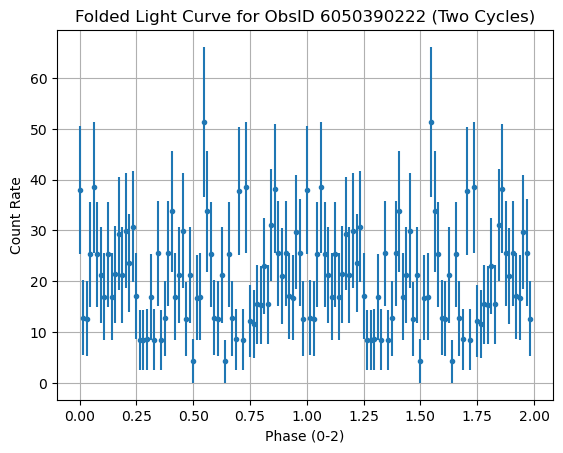

Processed ObsID 6050390222 with period 9.809. RMS and pulsed RMS saved.


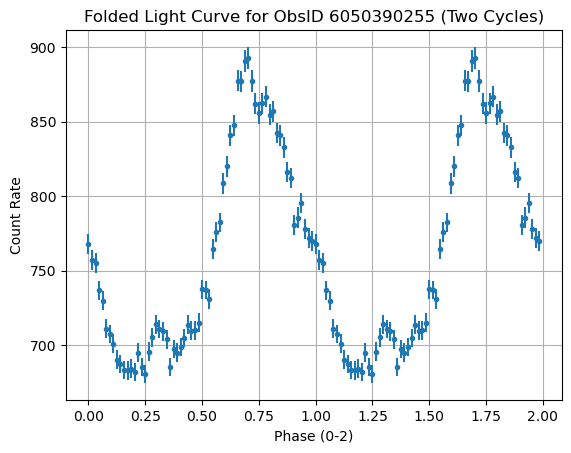

Processed ObsID 6050390255 with period 9.79. RMS and pulsed RMS saved.


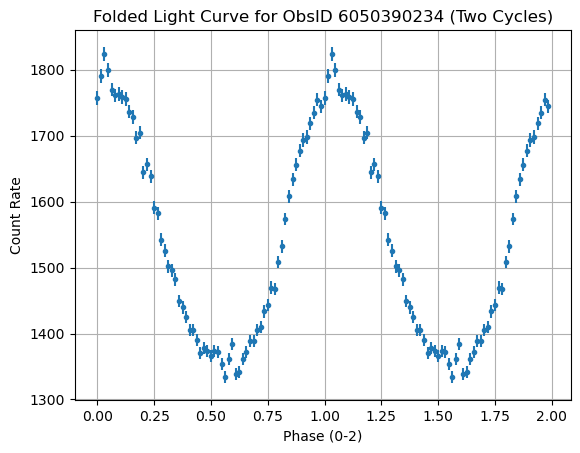

Processed ObsID 6050390234 with period 9.797. RMS and pulsed RMS saved.


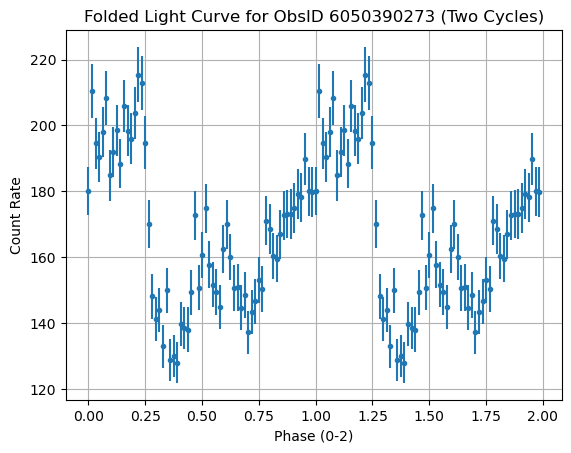

Processed ObsID 6050390273 with period 9.794. RMS and pulsed RMS saved.


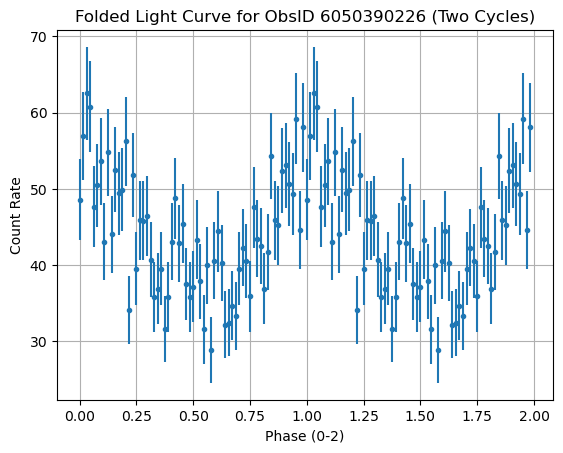

Processed ObsID 6050390226 with period 9.798. RMS and pulsed RMS saved.


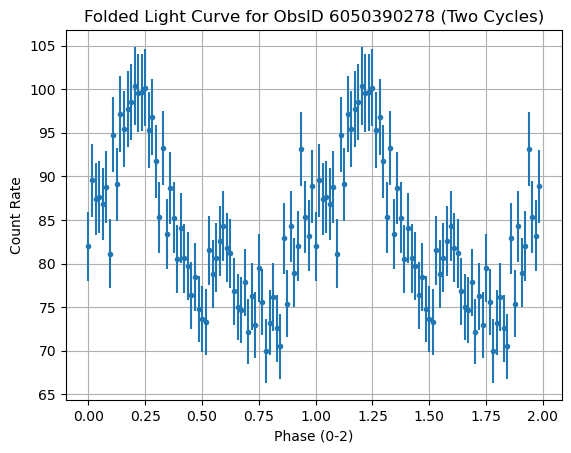

Processed ObsID 6050390278 with period 9.768. RMS and pulsed RMS saved.


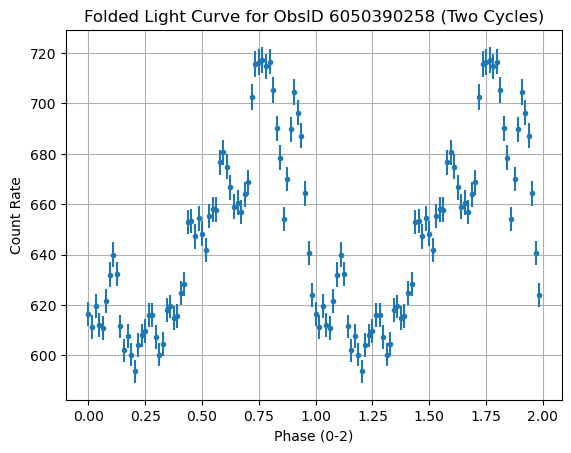

Processed ObsID 6050390258 with period 9.789. RMS and pulsed RMS saved.


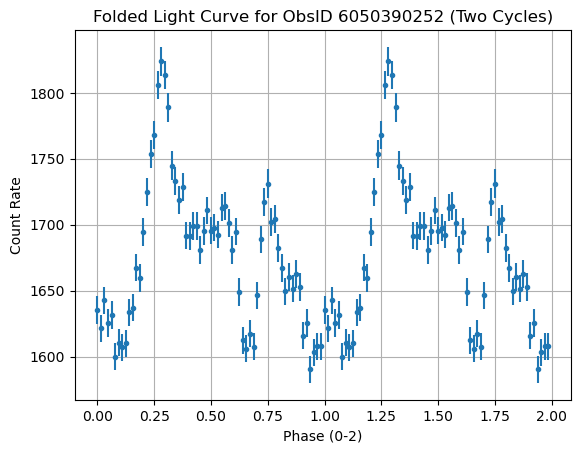

Processed ObsID 6050390252 with period 9.792. RMS and pulsed RMS saved.


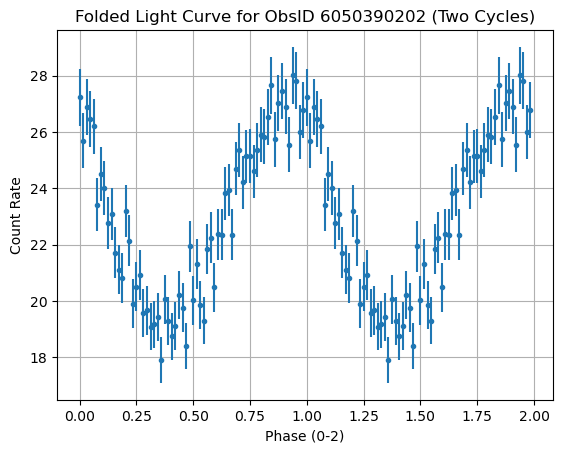

Processed ObsID 6050390202 with period 9.804. RMS and pulsed RMS saved.


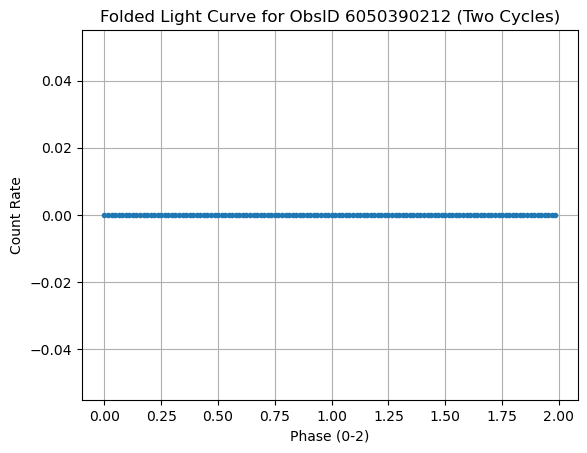

Processed ObsID 6050390212 with period 9.835. RMS and pulsed RMS saved.


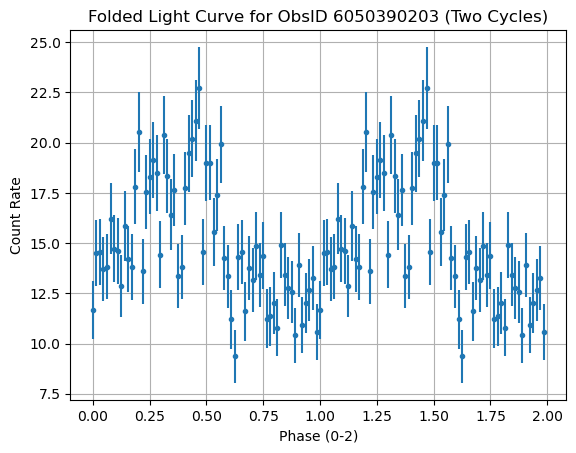

Processed ObsID 6050390203 with period 9.804. RMS and pulsed RMS saved.


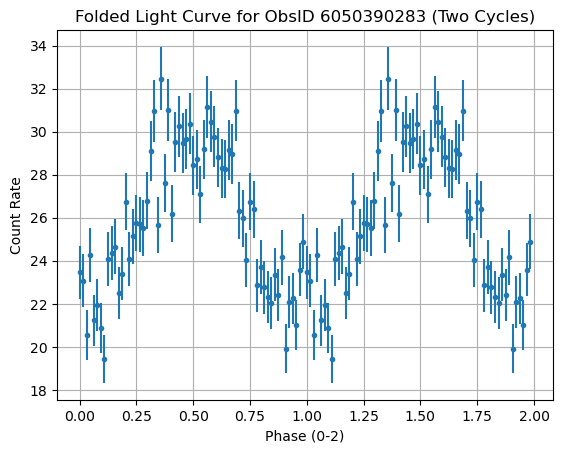

Processed ObsID 6050390283 with period 9.789. RMS and pulsed RMS saved.


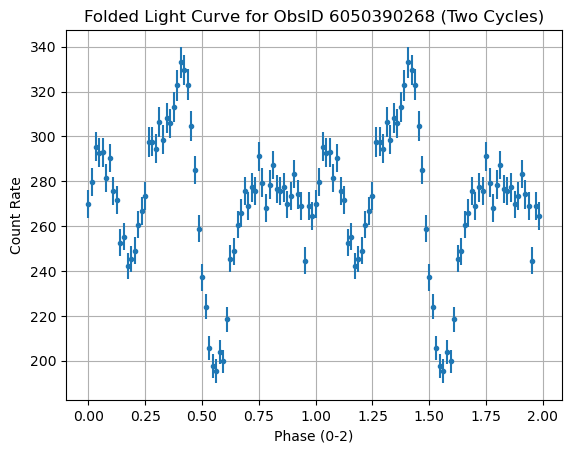

Processed ObsID 6050390268 with period 9.792. RMS and pulsed RMS saved.


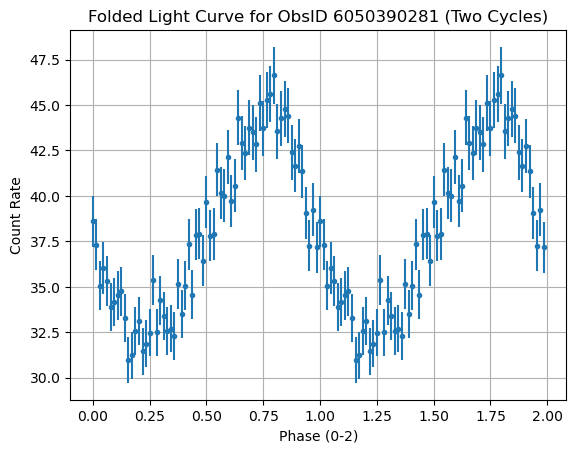

Processed ObsID 6050390281 with period 9.789. RMS and pulsed RMS saved.


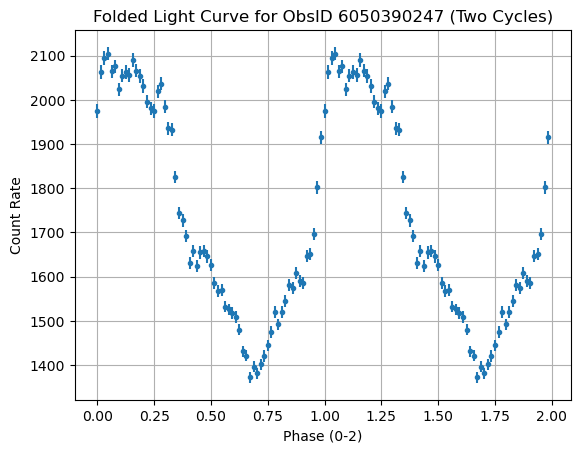

Processed ObsID 6050390247 with period 9.792. RMS and pulsed RMS saved.


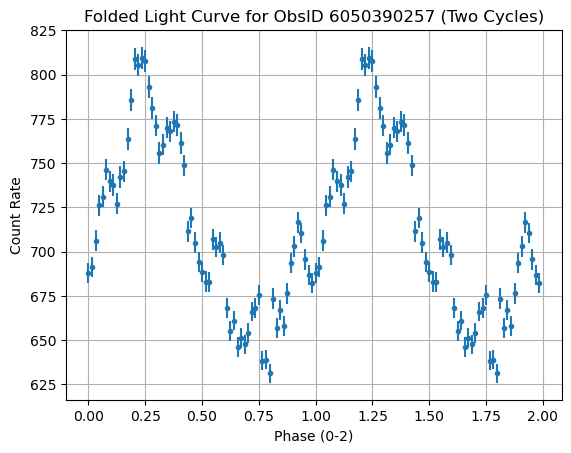

Processed ObsID 6050390257 with period 9.785. RMS and pulsed RMS saved.


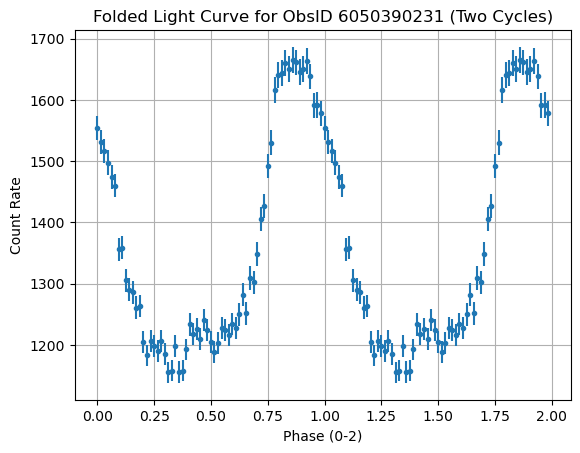

Processed ObsID 6050390231 with period 9.797. RMS and pulsed RMS saved.


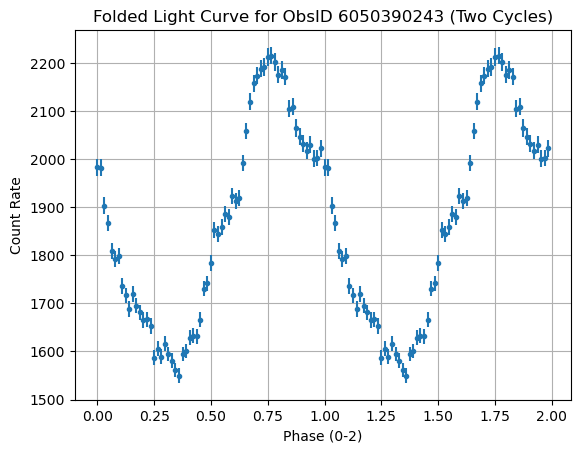

Processed ObsID 6050390243 with period 9.801. RMS and pulsed RMS saved.


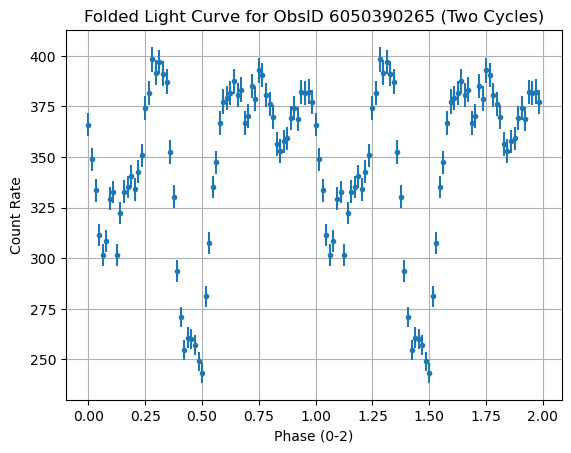

Processed ObsID 6050390265 with period 9.792. RMS and pulsed RMS saved.


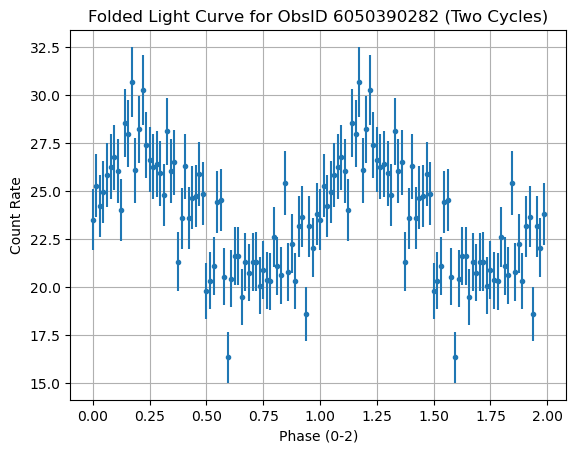

Processed ObsID 6050390282 with period 9.811. RMS and pulsed RMS saved.


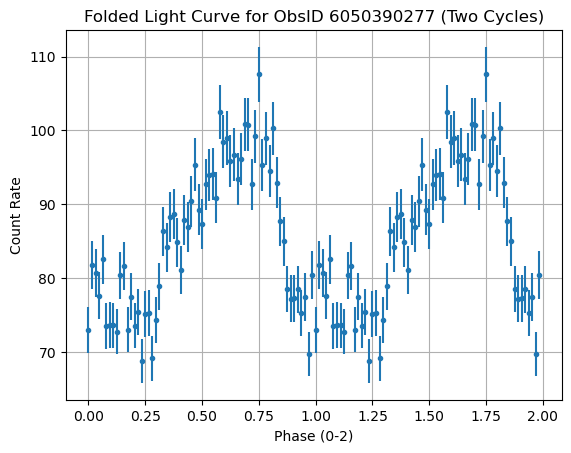

Processed ObsID 6050390277 with period 9.794. RMS and pulsed RMS saved.


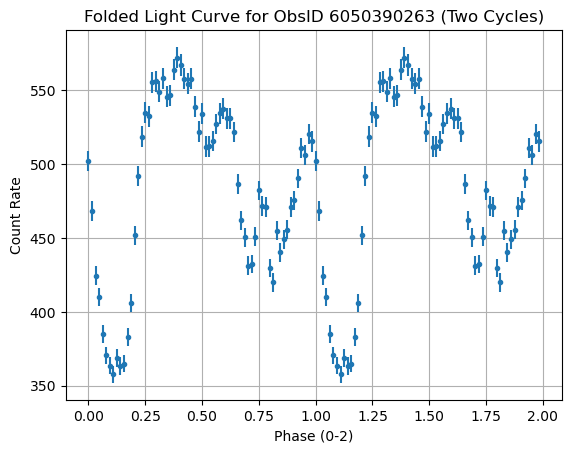

Processed ObsID 6050390263 with period 9.788. RMS and pulsed RMS saved.


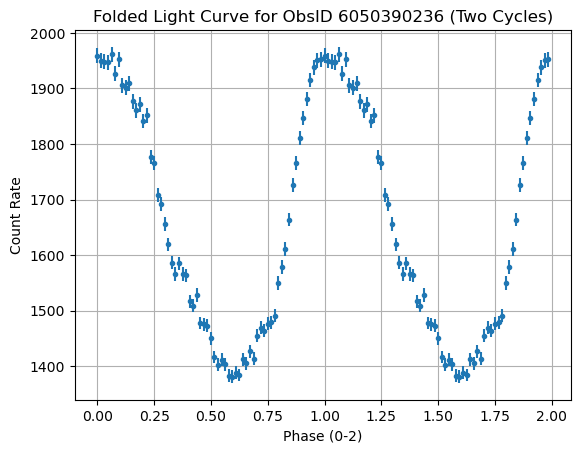

Processed ObsID 6050390236 with period 9.798. RMS and pulsed RMS saved.


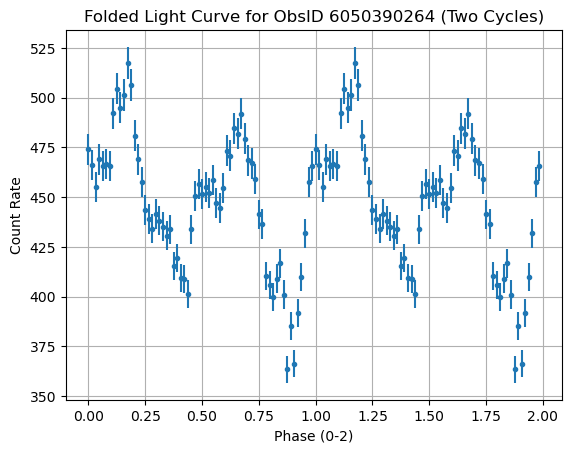

Processed ObsID 6050390264 with period 9.789. RMS and pulsed RMS saved.


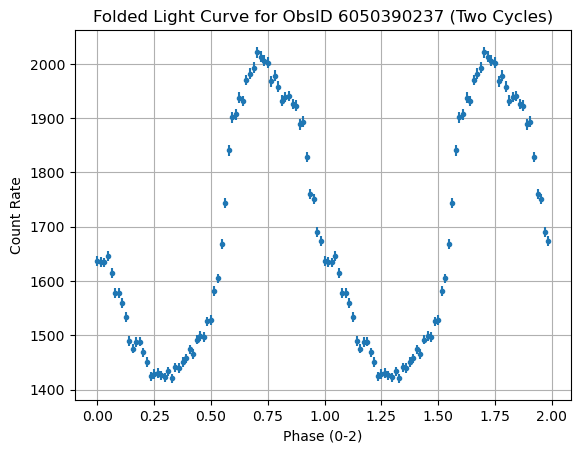

Processed ObsID 6050390237 with period 9.799. RMS and pulsed RMS saved.


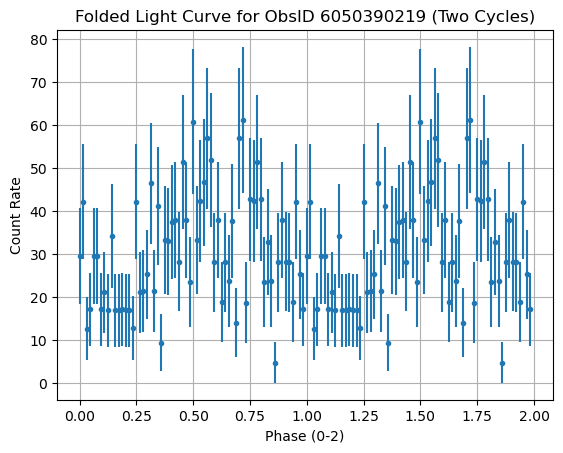

Processed ObsID 6050390219 with period 9.814. RMS and pulsed RMS saved.


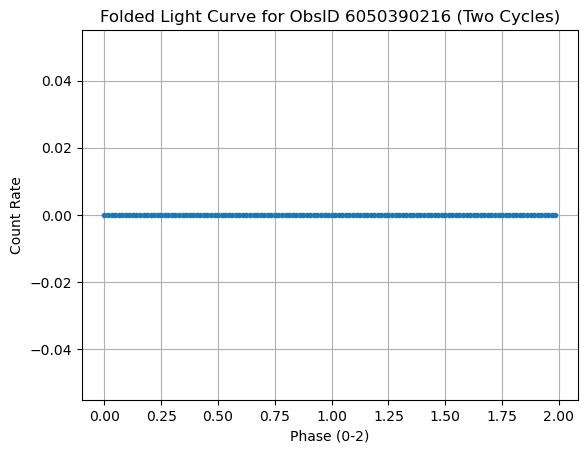

Processed ObsID 6050390216 with period 9.86. RMS and pulsed RMS saved.


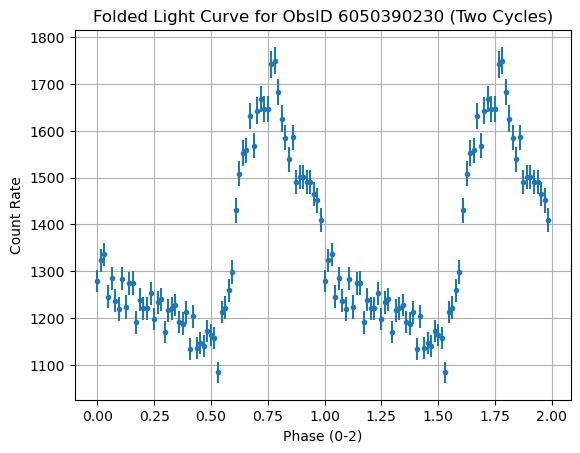

Processed ObsID 6050390230 with period 9.798. RMS and pulsed RMS saved.


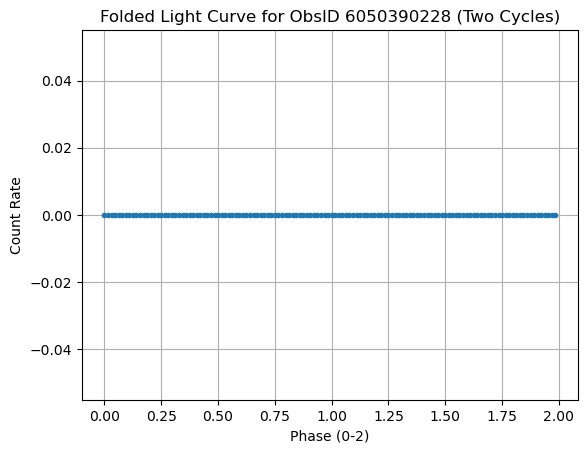

Processed ObsID 6050390228 with period 9.798. RMS and pulsed RMS saved.


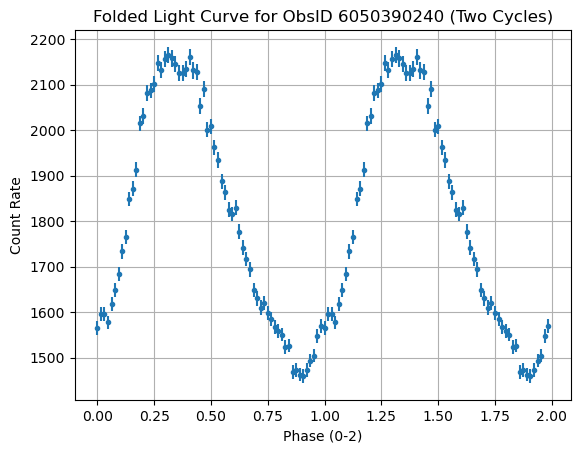

Processed ObsID 6050390240 with period 9.8. RMS and pulsed RMS saved.


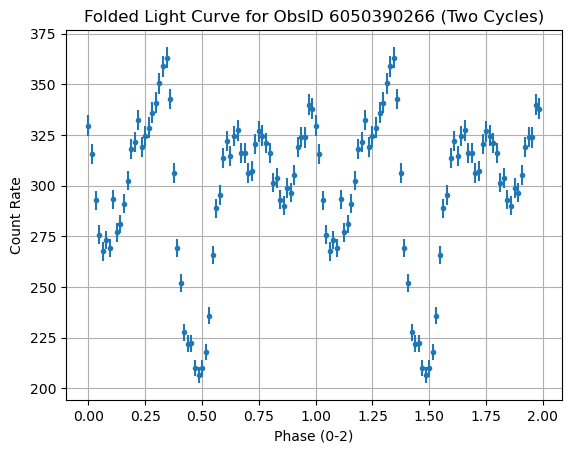

Processed ObsID 6050390266 with period 9.794. RMS and pulsed RMS saved.


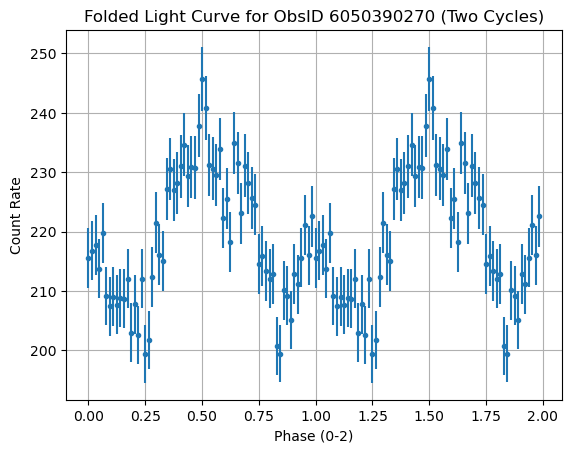

Processed ObsID 6050390270 with period 9.794. RMS and pulsed RMS saved.


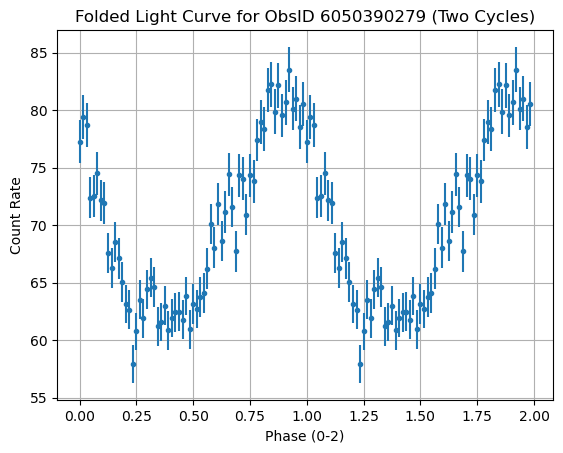

Processed ObsID 6050390279 with period 9.79. RMS and pulsed RMS saved.


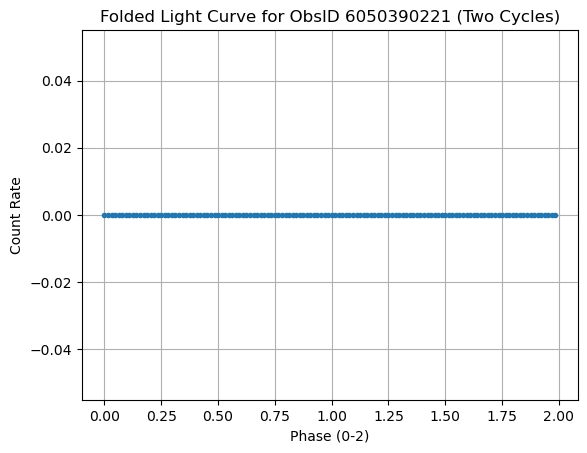

Processed ObsID 6050390221 with period 9.861. RMS and pulsed RMS saved.


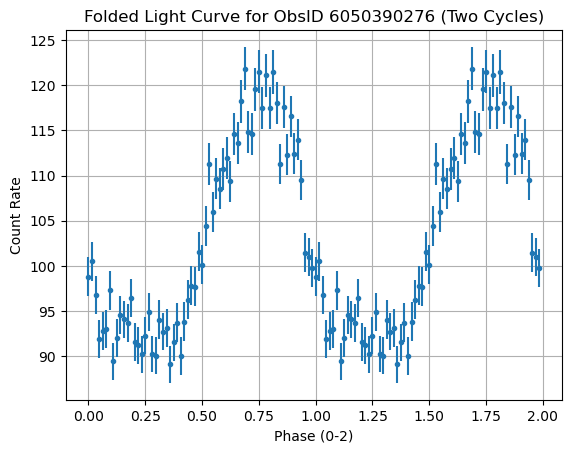

Processed ObsID 6050390276 with period 9.791. RMS and pulsed RMS saved.


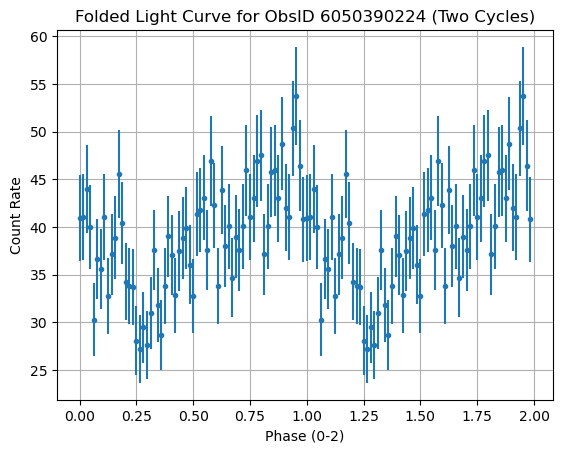

Processed ObsID 6050390224 with period 9.797. RMS and pulsed RMS saved.


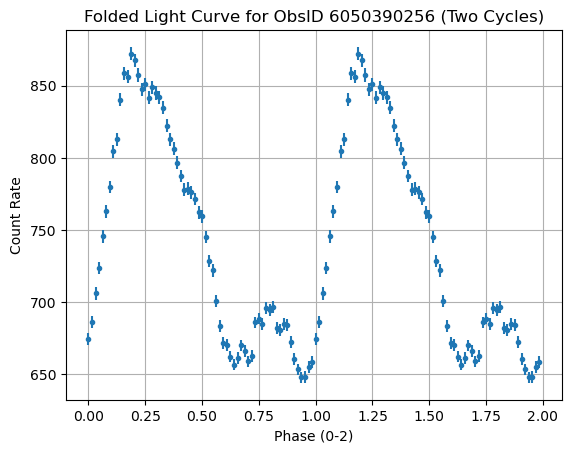

Processed ObsID 6050390256 with period 9.79. RMS and pulsed RMS saved.


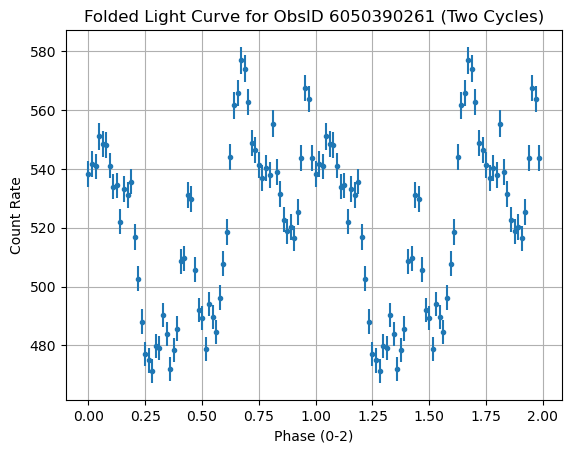

Processed ObsID 6050390261 with period 9.789. RMS and pulsed RMS saved.


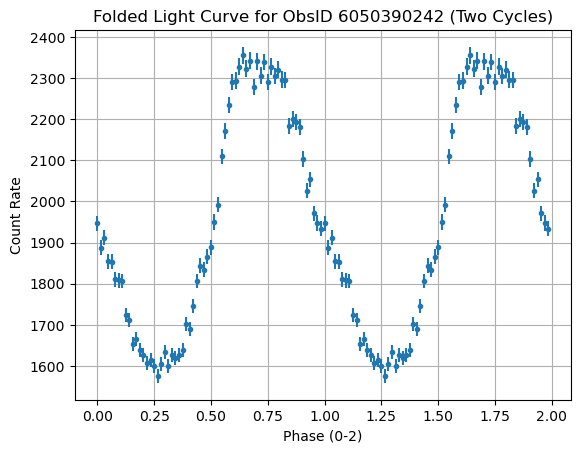

Processed ObsID 6050390242 with period 9.801. RMS and pulsed RMS saved.


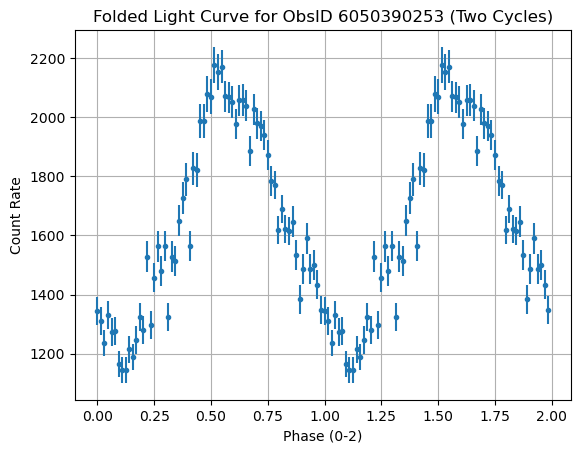

Processed ObsID 6050390253 with period 9.792. RMS and pulsed RMS saved.


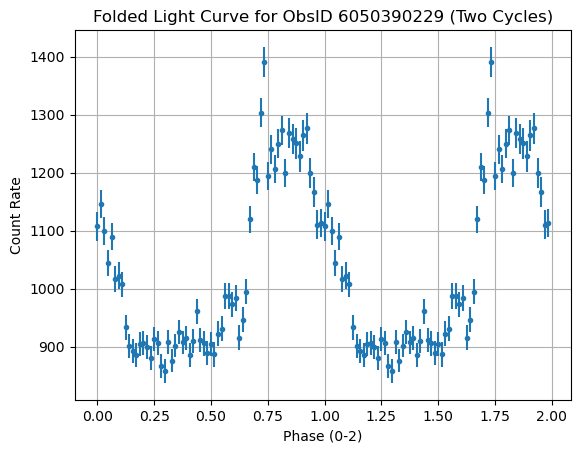

Processed ObsID 6050390229 with period 9.798. RMS and pulsed RMS saved.


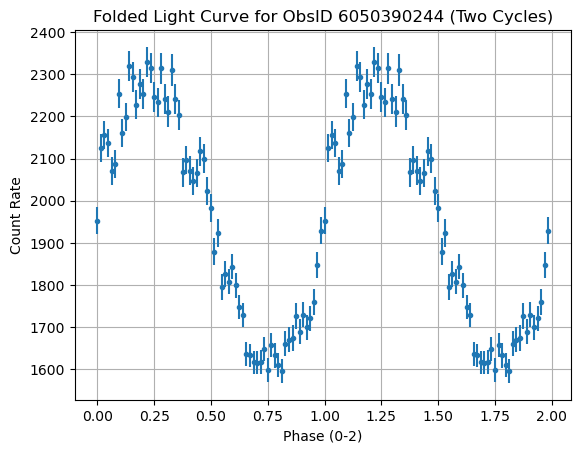

Processed ObsID 6050390244 with period 9.801. RMS and pulsed RMS saved.


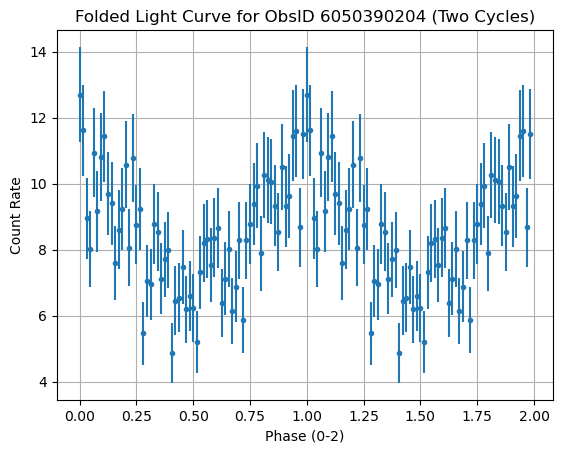

Processed ObsID 6050390204 with period 9.804. RMS and pulsed RMS saved.


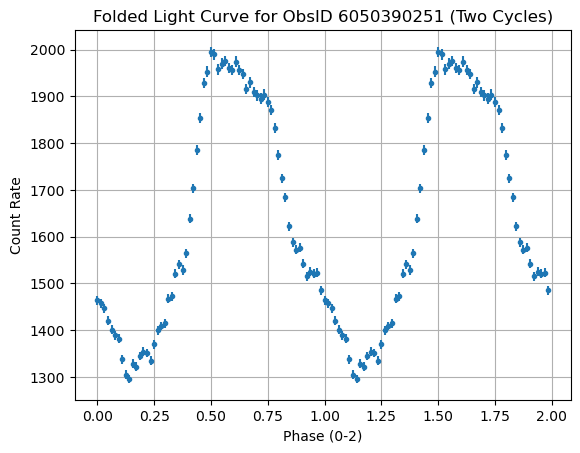

Processed ObsID 6050390251 with period 9.793. RMS and pulsed RMS saved.


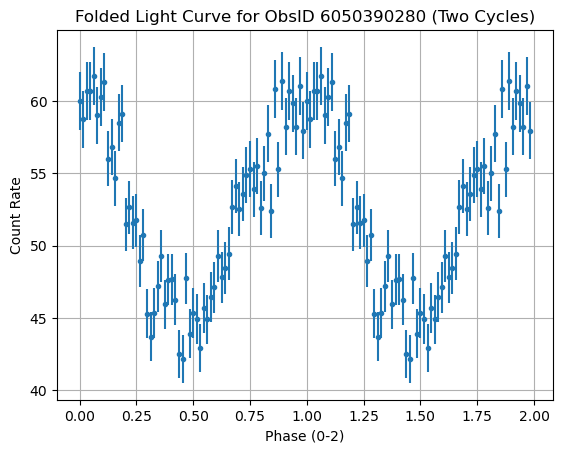

Processed ObsID 6050390280 with period 9.789. RMS and pulsed RMS saved.


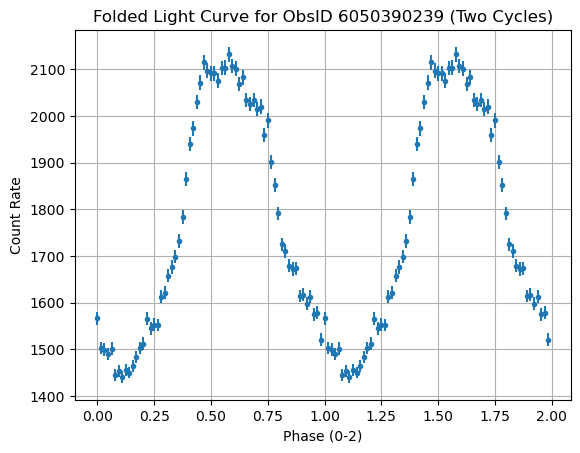

Processed ObsID 6050390239 with period 9.8. RMS and pulsed RMS saved.


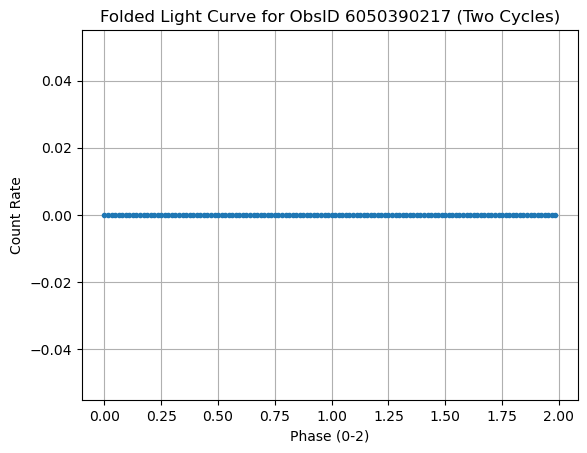

Processed ObsID 6050390217 with period 9.784. RMS and pulsed RMS saved.


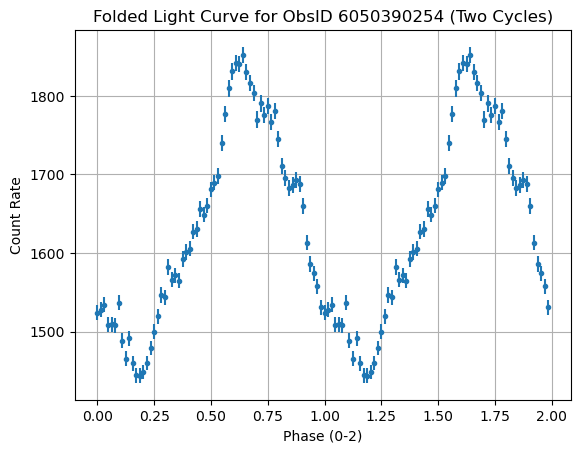

Processed ObsID 6050390254 with period 9.792. RMS and pulsed RMS saved.


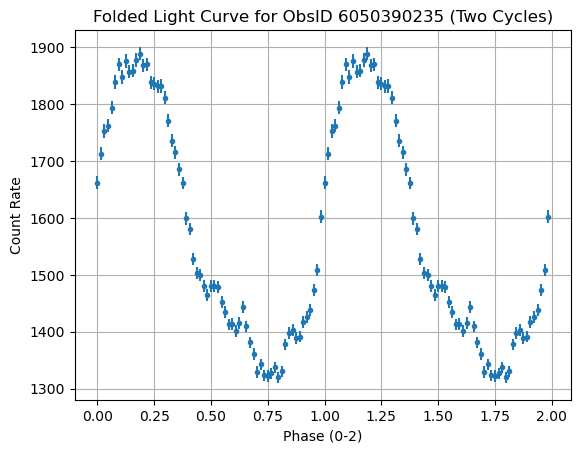

Processed ObsID 6050390235 with period 9.798. RMS and pulsed RMS saved.


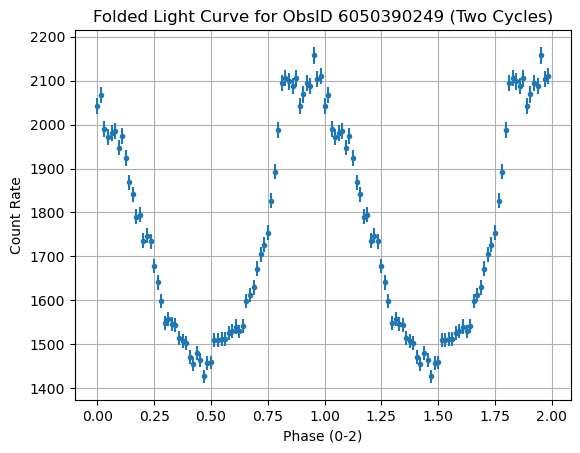

Processed ObsID 6050390249 with period 9.79. RMS and pulsed RMS saved.


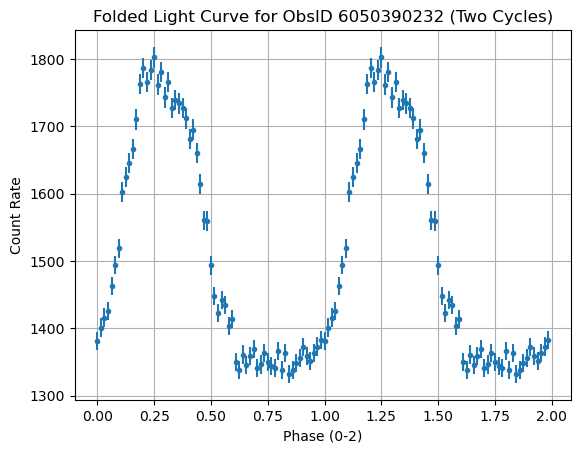

Processed ObsID 6050390232 with period 9.797. RMS and pulsed RMS saved.
File not found: ./reduced_output/6050390248/ni6050390248_cl_night_barycorrmpu7_sr_night.lc, skipping ObsID 6050390248
File not found: ./reduced_output/6050390269/ni6050390269_cl_night_barycorrmpu7_sr_night.lc, skipping ObsID 6050390269
File not found: ./reduced_output/6050390225/ni6050390225_cl_night_barycorrmpu7_sr_night.lc, skipping ObsID 6050390225
File not found: ./reduced_output/6050390206/ni6050390206_cl_night_barycorrmpu7_sr_night.lc, skipping ObsID 6050390206
File not found: ./reduced_output/6050390267/ni6050390267_cl_night_barycorrmpu7_sr_night.lc, skipping ObsID 6050390267
File not found: ./reduced_output/6050390223/ni6050390223_cl_night_barycorrmpu7_sr_night.lc, skipping ObsID 6050390223
File not found: ./reduced_output/6050390220/ni6050390220_cl_night_barycorrmpu7_sr_night.lc, skipping ObsID 6050390220
File not found: ./reduced_output/6050390259/ni6050390259_cl_night_barycorrmpu7_sr_night.lc, skipping O

In [34]:
# Load the text file data using pandas
input_file = 'all_lc_periods_chisq.txt'
df = pd.read_csv(input_file, delimiter='\t')

# Filter out rows where period is "-none-"
df = df[df['Period'] != "-none-"]

# Convert the 'Period' column to float for valid entries
df['Period'] = df['Period'].astype(float)
df['LC_File_Path'] = df['LC_File_Path'].astype(str)

# File to save RMS and pulsed RMS values
rms_output_file = 'rms_pulsed_rms.txt'

# Open the output file in write mode and add headers
with open(rms_output_file, 'w') as f:
    f.write('ObsID\tRMS_PF\tPF\n')

# Loop through each row and process the light curve
phase_bins = 64  # Set your desired number of phase bins
time_bin_size = 0.01  # Adjust as needed

for index, row in df.iterrows():
    obs_id = row['LC_File_Path']
    period = row['Period']
    
    # Construct the path to the light curve file
    lc_file = f'./reduced_output/{obs_id}/ni{obs_id}_cl_night_barycorrmpu7_sr_night.lc'

    # Check if the file exists before proceeding
    if os.path.exists(lc_file):
        try:
            # Read the light curve data
            tstart, time, rate, rate_error = read_fits_lightcurve(lc_file)

            # Perform the folding operation
            phase, binned_rate, binned_rate_error = fold_light_curve(time, rate, rate_error, period, phase_bins, tstart)

            # Calculate the phase-resolved RMS
            pulsed_fraction, rms_pulsed_fraction = calculate_rms(phase, binned_rate)

            # Append the RMS values to the output text file
            with open(rms_output_file, 'a') as f:
                f.write(f'{obs_id}\t{rms_pulsed_fraction:.6f}\t{pulsed_fraction:.6f}\n')

            # Define output folder for folded light curves
            output_folder = f'./folded_curves/{obs_id}'

            # Plot and save the folded light curve for two cycles
            plot_folded_light_curve(phase, binned_rate, binned_rate_error, obs_id, output_folder)

            print(f'Processed ObsID {obs_id} with period {period}. RMS and pulsed RMS saved.')

        except Exception as e:
            # Catch any exceptions that might occur and print the error
            print(f"Error processing {lc_file}: {e}")
    else:
        # If the file doesn't exist, print a warning and skip the entry
        print(f"File not found: {lc_file}, skipping ObsID {obs_id}")

In [15]:
##Finding out zero time for the same. 
# hdul=fits.open(lc1)
# print(hdul[1].header['TSTART']-hdul[1].header['TIMEZERO'])
# hdul[1].header['TSTART'],hdul[1].header['TIMEZERO']

In [ ]:
## read the PF record for plotting
pf_data=pd.read_csv('rms_pulsed_rms.txt',sep='\t',header=0)
pf_data=pf_data.sort_values(by='ObsID')

In [ ]:
plt.plot(pf_data['RMS_PF'],'-->')
plt.title('Pulsed Fraction')